# Problem 3.2

In this problem, you will learn to use a random number generator and create histograms.  This material is the subject of Chapter 6 in _A Student's Guide to Python._

In [1]:
# Standard setup
import numpy as np
import matplotlib.pyplot as plt

# Create a random number generator
from numpy.random import default_rng
rng = default_rng()

# Draw from the Uniform Distribution
rand = rng.random

Run the cell below several times.

In [2]:
rand()

0.544320337612857

Every time you call `rand()`, Python generates a random number between 0 and 1.  We can use Python's logic functions to turn this into a binary function.  Run the cell below several times.

In [5]:
rand() < 0.5

False

Describe what the output, and how it might be used to simulate the flip of a coin.

-----

The output of the above function shows that any value below the threshold of 0.5 produces a binary "False" result. Using this with a random number generator for numbers between 0 and 1 can simulate a coin flip as now the group of values from 0-0.49 can represent on side and the 0.5-1 values can represent another. 

-----

The goal of this problem is to "generate 6000 six-bit random binary fractions" and plot the result as a histogram.  Thus, we need to flip a coin six times, then use the results of each flip to create a binary fraction.  Let $s_n$ be the outcome of the $n$-th flip.  Then, the number generated by a set of six flips is

$$x = \dfrac{s_0}{2} + \dfrac{s_1}{2^2} + \dfrac{s_2}{2^3} + \dfrac{s_3}{2^4} + \dfrac{s_4}{2^5} + \dfrac{s_5}{2^6}$$

(This uses Python indexing for the coin flips.)

Run the following cell several times.  Verify that it generates a six-bit random binary fraction, then explain how it works.  That is, parse each line an explain how the Python code is implementing the matematical formula above.

-----

In [3]:
s = rand(6) < 0.5
x = np.sum(s / 2**np.arange(1,7))

print("x= {}".format(x))

x= 0.296875


The function above is generating an array of six random numbers between 0 and 1 and then creating a boolean array from those values. That array 's' creates a boolean True for any value less than 0.5 and a False for any value greater than 0.5. This essentially creates an array of 6 coin flips. The next line of code, variable 'x', produces a six-bit binary fraction. This is done by summing up the fractions of s/2^n from n=1 to n=6. The boolean array 's' essentially adds a 1 in the numerator for the space where a True value exists in the array and a 0 where a False value exists. In essense the coin flip randomly determines if each fraction (s0 to s5) is included in the calculation of the random decimal. The final line of code prints the decimal 'x' in the correct format.

------

Now, write a `for` loop that will create an array and fill it with `N=6,000` six-bit random binary fractions.  (You can copy and paste the first two lines of the code cell above into the body of the `for` loop, or develop your own algorithm.)

In [4]:
fractions = np.empty(6000)
for N in range(6000):
    s = rand(6) < 0.5
    x = np.sum(s / 2**np.arange(1,7))
    fractions[N] = x
len(fractions) #checking that the fractions array has 6000 entities in it

6000

In [5]:
fractions

array([0.640625, 0.265625, 0.984375, ..., 0.390625, 0.125   , 0.203125])

Use `plt.hist` to create a histogram of your data set.

(array([666., 550., 590., 667., 507., 576., 638., 568., 614., 624.]),
 array([0.       , 0.0984375, 0.196875 , 0.2953125, 0.39375  , 0.4921875,
        0.590625 , 0.6890625, 0.7875   , 0.8859375, 0.984375 ]),
 <BarContainer object of 10 artists>)

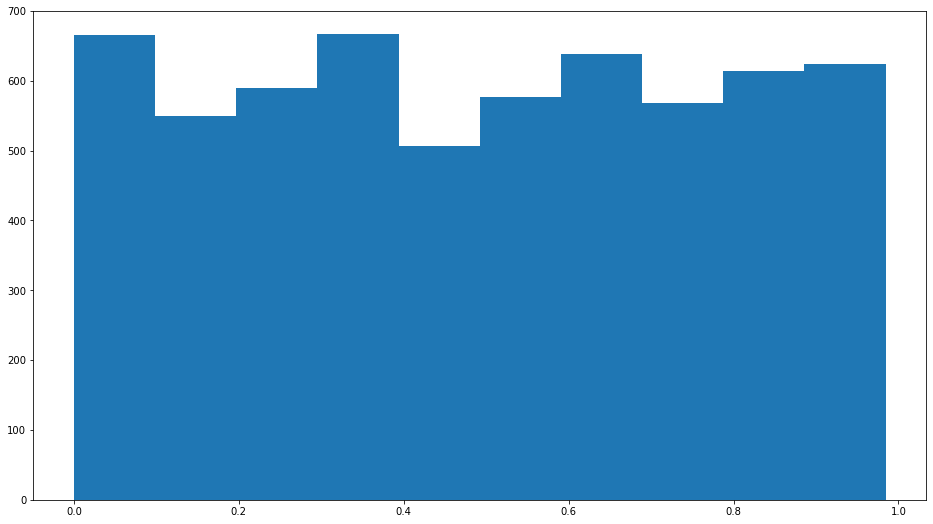

In [6]:
plt.figure(figsize=(16,9))
plt.hist(fractions)

## Bonus

___Challenge 1:___  Use `plt.subplot` or `plt.subplots` to make a single row of three separate histograms.  (See Section 4.3.9 for details.)  Use 10 bins for the first, 100 for the second, and 1000 bins for the third.

(array([ 91.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 101.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  90.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  99.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  92.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  94.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  99.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  90.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 111.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  81.,
          0.,   0.,   0.,   0.,   0., 

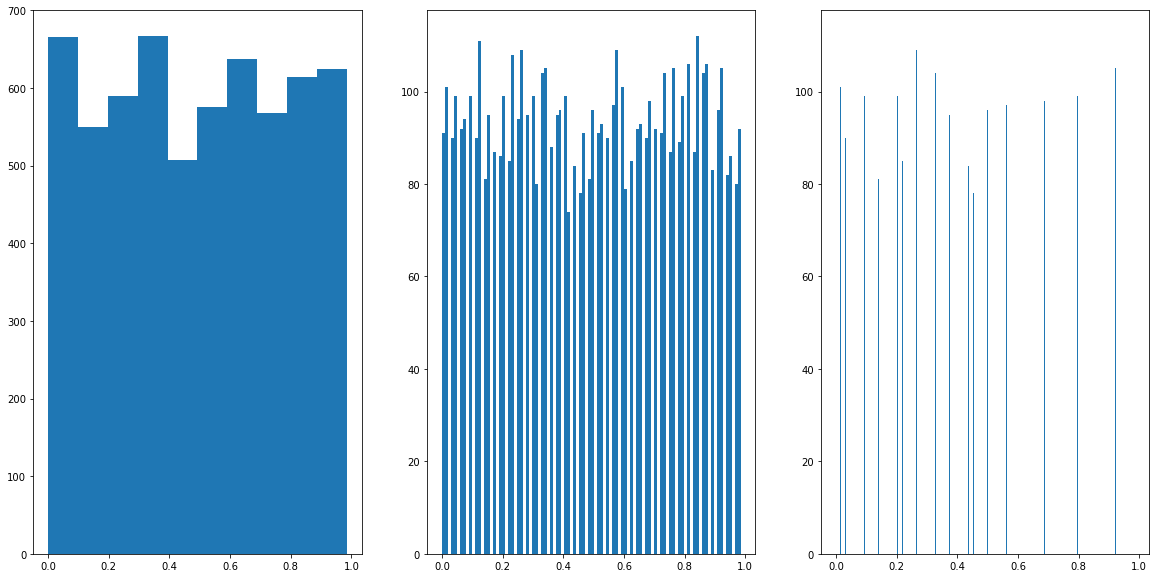

In [7]:
plt.figure(figsize = (20,10))
plt.subplot(1,3,1); plt.hist(fractions,bins = 10)
plt.subplot(1,3,2); plt.hist(fractions,bins = 100)
plt.subplot(1,3,3); plt.hist(fractions,bins = 1000)

___Challenge 2:___ Write the body of the function described below.  Include comments.  Test and debug it.

Plotting a histogram of `binary_fractions(6,6000)` should produce similar output to what you created above ...

In [8]:
def binary_fractions(m, N):
    """
    Generate and return an array of N m-bit binary fractions.
    
    Input
        m = number of bits
        N = number of binary fractions to generate
    
    Returns
        x = N-element array of m-bit binary fractions
    """
    x = np.empty(N)
    for i in range(N):
        s = rand(m) < 0.5
        y = np.sum(s / 2**np.arange(1,(m+1)))
        x[i] = y
     
    return x

In [ ]:
binary_fractions(8,6000)